# Problem Statement:

The World Health Organization says that more people die from heart problems than anything else in the world. It's about 17 million people each year, and a big part of that is heart disease. The big issue is figuring out who might get heart disease and taking action early to prevent it, instead of waiting until people get sick.


# Objectives:

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

## Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split    # split the data for training & testing 

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import tree                                # For working with Decision Tree

In [2]:
# Importing the Dataset

data = pd.read_csv(r"C:\Users\vikas\Coding\ML\DataSet\heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Description:

In [3]:
# 303 rows, 14 columns

# sex --> 1 - Male, 0 - Female

# cp --> level of chest pain (0,1,2,3)
# 0 - no chain pain
# 1 - low chain pain
# 2 - medimum chain pain
# 3 - high chain pain


# trestbps --> When a patient is resting, what's his blood pressure

# chol --> cholestrol level

# fbs --> Blood sugar level when the person is fasting

# restecg --> when a person is resting, what's his ecg

# thalach --> Maximum heart rate achieved

# exang --> Exercise Induce Angena, chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP

# oldpeak --> these are values of crest and trough of ecg

# slope --> slope values

# ca --> Maximum no. of major blood vessels --> 0,1,2,3

# thal --> 0,1,2
#         Genetic disorder
#         0 --> no genetic disorder
#         1 --> genetic disorder(fixed effect) --> cannot be treated
#         2 --> genetic disorder(reversible) --> treated

# target --> whether the person is having a heart disease or not
#       0 --> The person is not having heart disease
#       1 --> The person is having a heart disease

In [3]:
data = data.rename(columns={
    'cp': 'chest_pain_level',
    'trestbps': 'restingbp',
    'fbs': 'sugar_level',
    'thalach': 'Max_heart_rate',
    'exang': 'Chest_pain_gym',
    'thal': 'genetic_disorder',   
})

# EDA


In [4]:
data.head()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age                 0
sex                 0
chest_pain_level    0
restingbp           0
chol                0
sugar_level         0
restecg             0
Max_heart_rate      0
Chest_pain_gym      0
oldpeak             0
slope               0
ca                  0
genetic_disorder    0
target              0
dtype: int64

In [7]:
data.dtypes

age                   int64
sex                   int64
chest_pain_level      int64
restingbp             int64
chol                  int64
sugar_level           int64
restecg               int64
Max_heart_rate        int64
Chest_pain_gym        int64
oldpeak             float64
slope                 int64
ca                    int64
genetic_disorder      int64
target                int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               303 non-null    int64  
 1   sex               303 non-null    int64  
 2   chest_pain_level  303 non-null    int64  
 3   restingbp         303 non-null    int64  
 4   chol              303 non-null    int64  
 5   sugar_level       303 non-null    int64  
 6   restecg           303 non-null    int64  
 7   Max_heart_rate    303 non-null    int64  
 8   Chest_pain_gym    303 non-null    int64  
 9   oldpeak           303 non-null    float64
 10  slope             303 non-null    int64  
 11  ca                303 non-null    int64  
 12  genetic_disorder  303 non-null    int64  
 13  target            303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# We dont have null values in this data set

In [9]:
data.describe()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.columns

Index(['age', 'sex', 'chest_pain_level', 'restingbp', 'chol', 'sugar_level',
       'restecg', 'Max_heart_rate', 'Chest_pain_gym', 'oldpeak', 'slope', 'ca',
       'genetic_disorder', 'target'],
      dtype='object')

In [11]:
# Checking how many 1 & 0 values present in the target variable

data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
# Setting some banch marks as select those persons who is  having cholestrol level above 300


data[data["chol"]>300].shape

# there are 43 people

(43, 14)

In [13]:
data[data["chol"]>300].count()

age                 43
sex                 43
chest_pain_level    43
restingbp           43
chol                43
sugar_level         43
restecg             43
Max_heart_rate      43
Chest_pain_gym      43
oldpeak             43
slope               43
ca                  43
genetic_disorder    43
target              43
dtype: int64

In [14]:
# Select those persons who is  having cholestrol level above 300 & age above 40
# As these people will be at high risk of having Heart attack

data[(data["chol"]>300) & (data["age"]>40)].shape

# there are 42 peoples

(42, 14)

In [16]:
# Checking how many peoples having Genetic disorder which can be treated


data[data["genetic_disorder"]==2]


,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [17]:
# Done with EDA

### Visualization

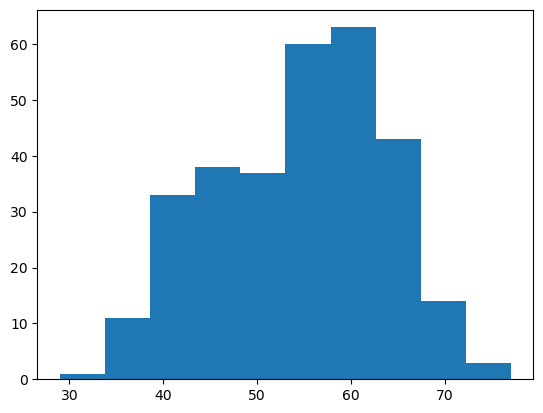

In [17]:
# Making histogram to understand the distribution of the data


plt.hist(data["age"]);

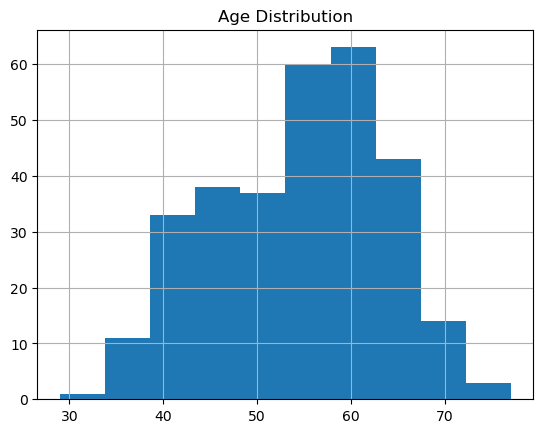

In [18]:
# We we want the histogram with grid

data["age"].hist(grid=True)
plt.title("Age Distribution");


# According to histogram we can figure out roughly that our data might be -ve skewed

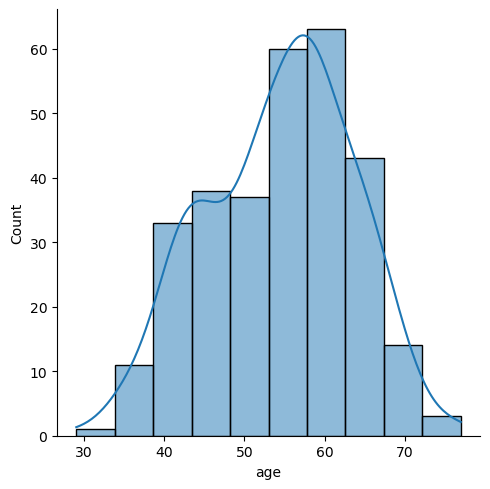

In [19]:
# Lets check using Displot

sns.displot(data["age"],bins = 10, kde = True);



In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

<br>
If we ignore left side hike then it is near to the balance data or normally distributed data

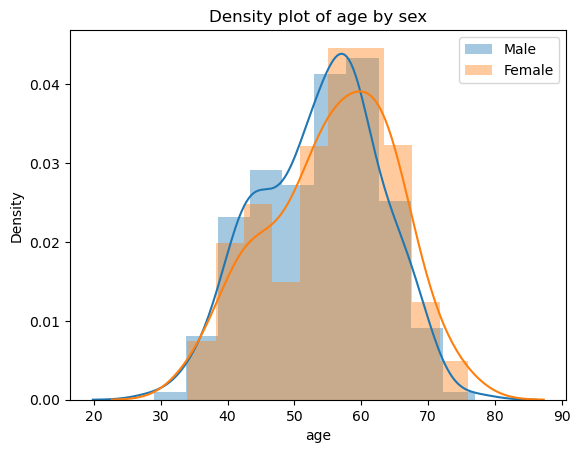

In [20]:
# Checking the Male & Female distribution

sns.distplot(data[data['sex']==1]['age'],  label='Male',bins=10,kde=True)
sns.distplot(data[data['sex']==0]['age'], label='Female',bins=10,kde=True)
plt.legend()
plt.title('Density plot of age by sex')
plt.show()


Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

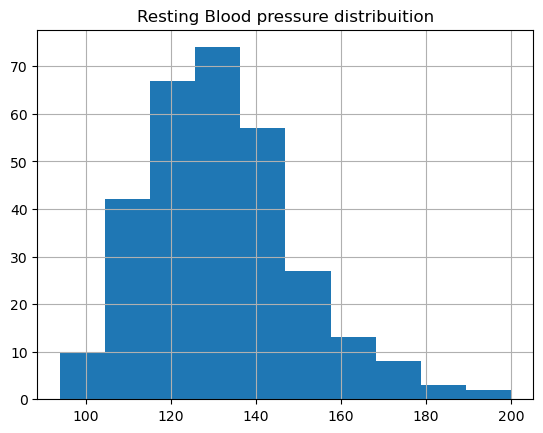

In [21]:
data['restingbp'].hist()
plt.title('Resting Blood pressure distribuition');

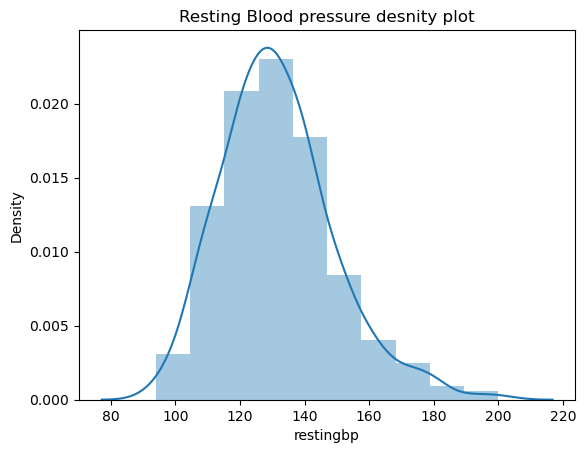

In [23]:
sns.distplot(data['restingbp'], bins=10, kde=True)
plt.title('Resting Blood pressure desnity plot');

Above chart is +ve skewed & if we ignore end part then it is normally distributed

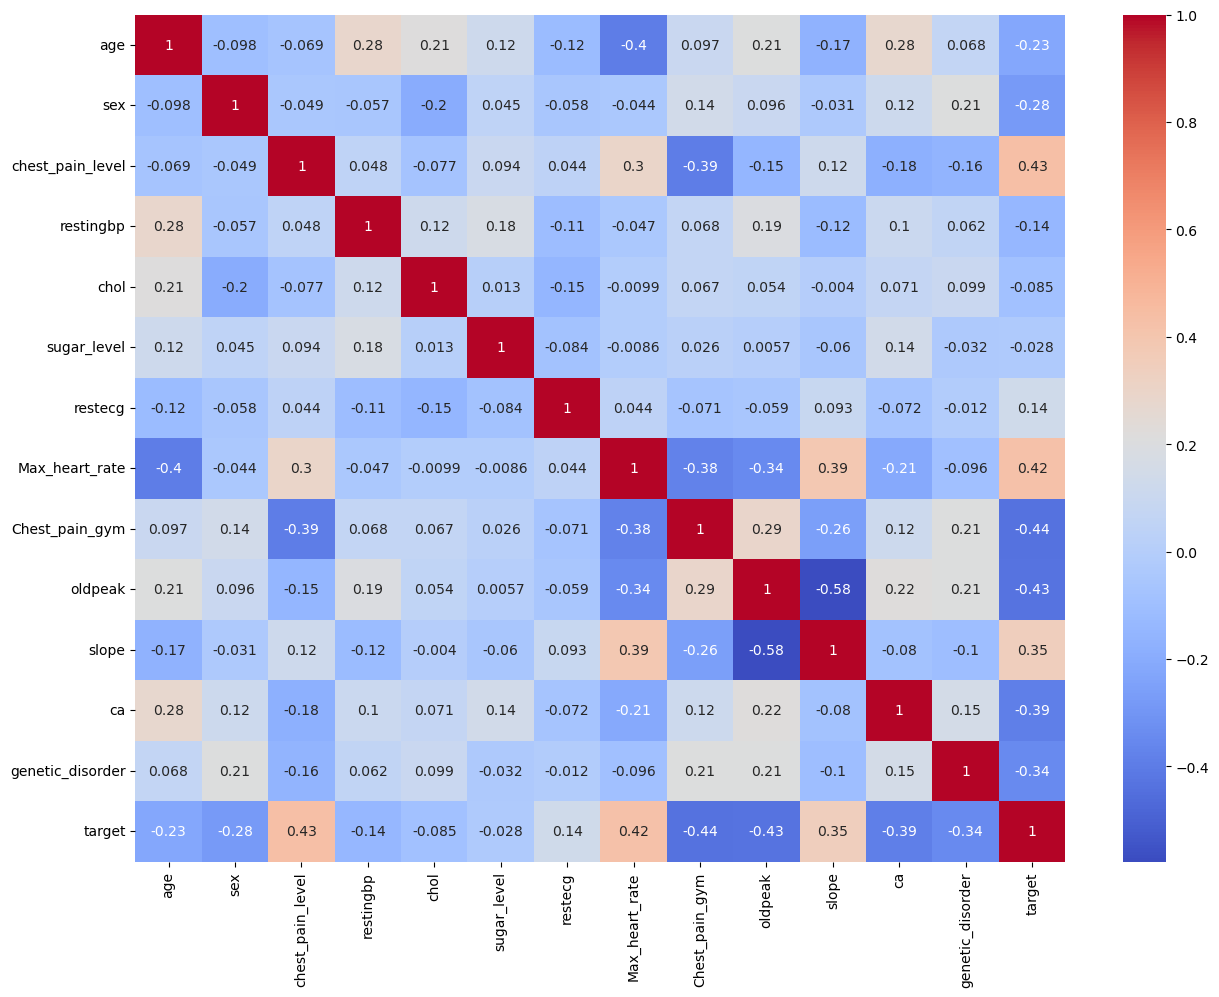

In [24]:
# Making Heat map for seeing the correlation

plt.figure(figsize = (15,11))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [25]:
# Checking outliers are present or not using boxplot


col_list = list(data.columns)
col_list

['age',
 'sex',
 'chest_pain_level',
 'restingbp',
 'chol',
 'sugar_level',
 'restecg',
 'Max_heart_rate',
 'Chest_pain_gym',
 'oldpeak',
 'slope',
 'ca',
 'genetic_disorder',
 'target']

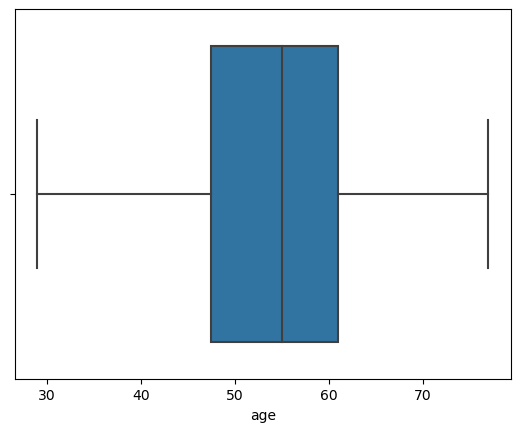

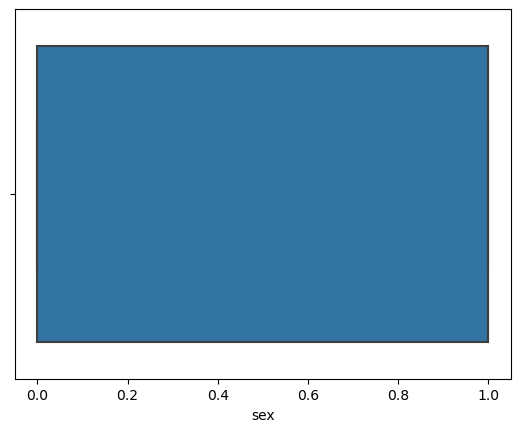

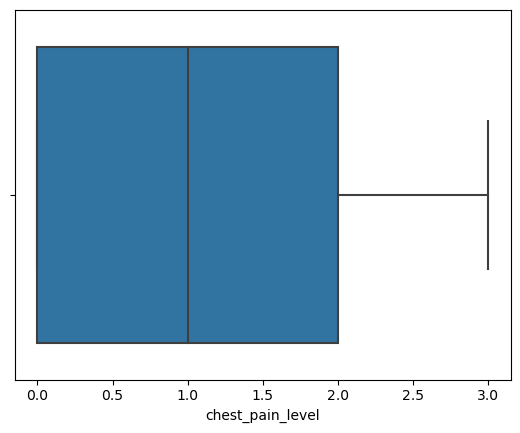

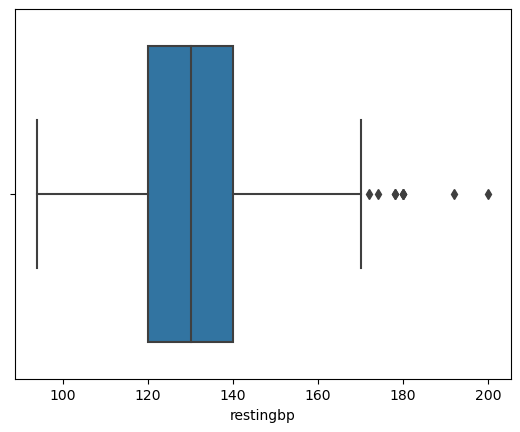

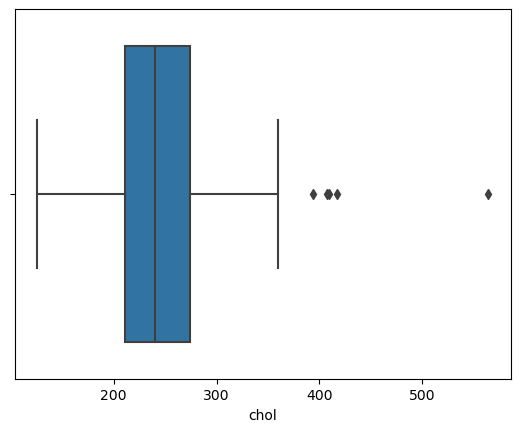

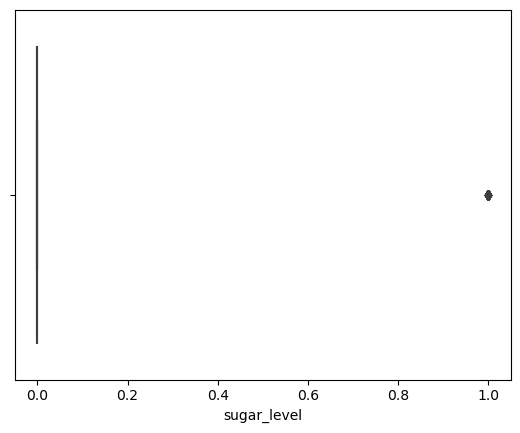

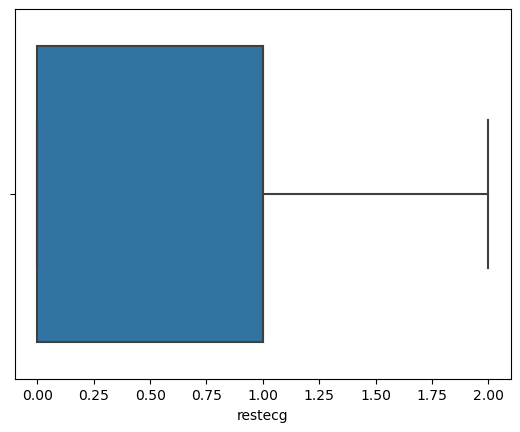

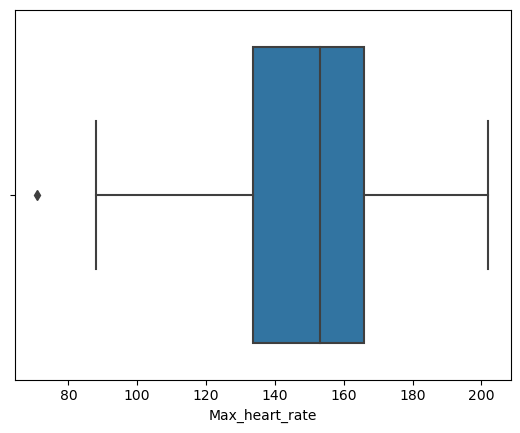

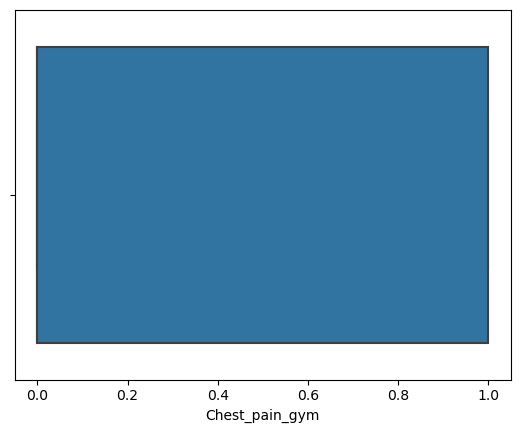

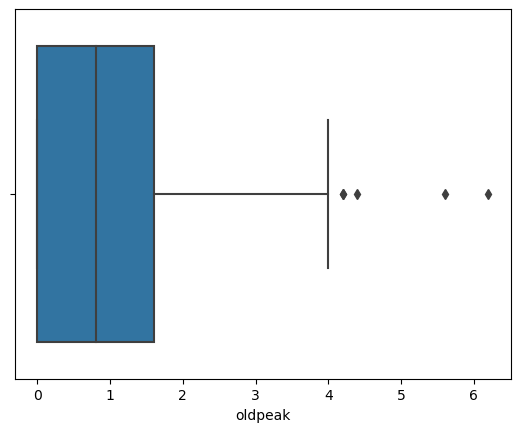

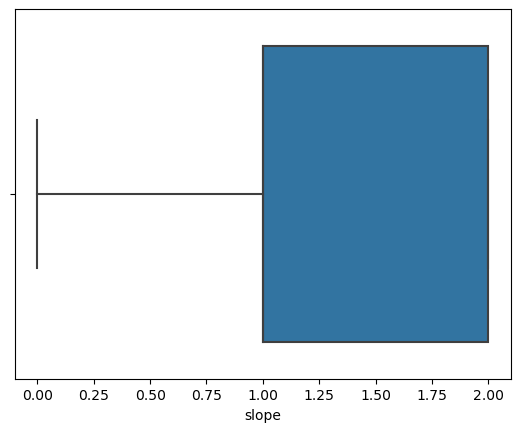

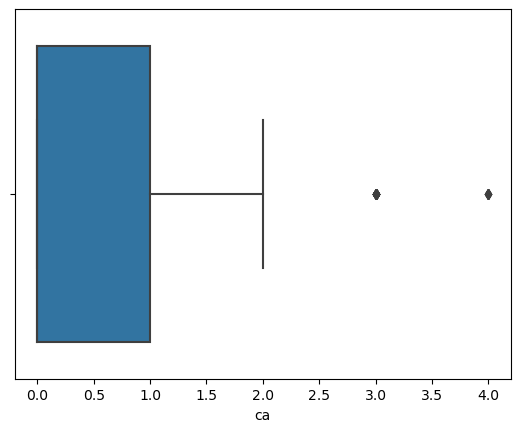

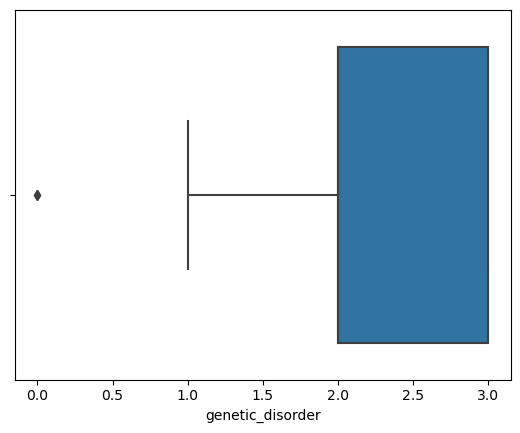

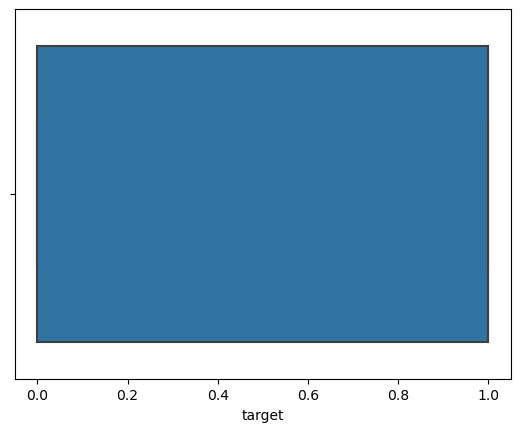

In [27]:

for i in col_list:
    if (data[i].dtypes !="object"):
        plt.figure()
        sns.boxplot(x=data[i])

In [28]:
# So, we have very few outliers and in decision tree no need to treat them

# Feature Engineering:

### Feature Scaling:

In [28]:
x = data.iloc[:,:-1]    # Independent variable should always be in a dataframe format(2D) data

y = data["target"]      # Dependent or Target variable

print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [29]:
x.head()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)
data_scaled = pd.DataFrame(scaled_features, columns=x.columns)


In [31]:
data_scaled.head()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [32]:
# I'm not performing the encoding part here beacuse I dont have any categorical data here.

## Feature Selection using VIF

In [33]:
data.head()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):   # taken charges bcz it is target variable
        col_name.append(i)

        
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data


,feature,VIF
0,age,38.998305
1,sex,3.523211
2,chest_pain_level,2.414403
3,restingbp,58.557335
4,chol,26.267365
5,sugar_level,1.268205
6,restecg,2.058206
7,Max_heart_rate,42.742178
8,Chest_pain_gym,2.022527
9,oldpeak,3.062890


In [36]:
# we got the VIF, now find highist VIF and Drop that column permentaly

# "trestbps" has highest VIF i.e 58.5573

# VIF < 5 ---> indicate low multicollinearity

# We have to drop all those columns which have VIF => 6 

# 1st calculate VIF, drop column -- again calculate VIF, Drop column -- so on


data = data.drop(["restingbp"], axis = 1)


In [37]:
# Now Calculate VIF again

col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):
        col_name.append(i)

# We need to perform above code every time bcz we are droping the columns one by one

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,28.599796
1,sex,3.522376
2,chest_pain_level,2.403644
3,chol,25.923434
4,sugar_level,1.250256
5,restecg,2.058206
6,Max_heart_rate,34.026519
7,Chest_pain_gym,1.990878
8,oldpeak,2.973430
9,slope,10.067190


In [39]:
# Highist VIF ---> 34.02

data = data.drop(["Max_heart_rate"], axis = 1)

KeyError: "['Max_heart_rate'] not found in axis"

In [40]:
# Now Calculate VIF again

col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):
        col_name.append(i)

# We need to perform above code every time bcz we are droping the columns one by one

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,27.213596
1,sex,3.412645
2,chest_pain_level,2.264790
3,chol,22.374105
4,sugar_level,1.248307
5,restecg,2.022210
6,Chest_pain_gym,1.955987
7,oldpeak,2.965697
8,slope,8.372679
9,ca,1.760648


In [41]:
# Highist VIF ---> 27.21

data = data.drop(["age"], axis = 1)

In [42]:
# Now Calculate VIF again

col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):
        col_name.append(i)

# We need to perform above code every time bcz we are droping the columns one by one

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,sex,3.404301
1,chest_pain_level,2.211674
2,chol,14.917083
3,sugar_level,1.232428
4,restecg,2.006017
5,Chest_pain_gym,1.947640
6,oldpeak,2.827322
7,slope,7.983150
8,ca,1.710828
9,genetic_disorder,14.860553


In [43]:
# Highist VIF ---> 14.91

data = data.drop(["chol"], axis = 1)

In [44]:
# Now Calculate VIF again

col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):
        col_name.append(i)

# We need to perform above code every time bcz we are droping the columns one by one

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,sex,3.348022
1,chest_pain_level,2.154649
2,sugar_level,1.223893
3,restecg,2.005247
4,Chest_pain_gym,1.915642
5,oldpeak,2.628953
6,slope,6.201591
7,ca,1.707658
8,genetic_disorder,10.478889


In [45]:
# Highist VIF ---> 10.47

data = data.drop(["genetic_disorder"], axis = 1)

In [46]:
# Now Calculate VIF again

col_name = []

for i in data.columns:
    if (data[i].dtypes != "object") and (i != 'target'):
        col_name.append(i)

# We need to perform above code every time bcz we are droping the columns one by one

x = data[col_name]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,sex,3.038525
1,chest_pain_level,2.112149
2,sugar_level,1.222870
3,restecg,1.957971
4,Chest_pain_gym,1.795800
5,oldpeak,2.062440
6,slope,3.756703
7,ca,1.686170


In [47]:
# Now all the VIF values are less then 5 so no need to drop any column further

# Pre-check the best data for the model

In [48]:
data.head()

,sex,chest_pain_level,sugar_level,restecg,Chest_pain_gym,oldpeak,slope,ca,target
0,1,3,1,0,0,2.3,0,0,1
1,1,2,0,1,0,3.5,0,0,1
2,0,1,0,0,0,1.4,2,0,1
3,1,1,0,1,0,0.8,2,0,1
4,0,0,0,1,1,0.6,2,0,1


In [49]:
x = data.iloc[:,:-1]    # Independent variable should always be in a dataframe format(2D) data

y = data["target"]      # Dependent or Target variable

print(x.shape)
print(y.shape)

(303, 8)
(303,)


In [50]:
# Taking 70% of data for training and 30% for testing

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,train_size=0.7)

print(x_train.shape)
print(y_train.shape)

(212, 8)
(212,)


In [51]:
clf = tree.DecisionTreeClassifier() 

# we are creating a decision tree model which is untrained

In [52]:
clf.fit(x_train,y_train)   # Training the data

DecisionTreeClassifier()

In [53]:
# Testing the Model

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

In [54]:
# Now checking the accuracy of our model

from sklearn.model_selection import train_test_split    # split the data for training & testing 

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import tree    # For working with Decision Tree

accuracy_score(y_test_pred,y_test)

0.8241758241758241

In [55]:
accuracy_score(y_train_pred,y_train)

0.9764150943396226

### Checking the performance of the model on the scaled data

In [56]:
merged_data = pd.concat([data_scaled, y], axis=1)
merged_data.head()

,age,sex,chest_pain_level,restingbp,chol,sugar_level,restecg,Max_heart_rate,Chest_pain_gym,oldpeak,slope,ca,genetic_disorder,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


In [57]:
p = merged_data.iloc[:,:-1]    # Independent variable should always be in a dataframe format(2D) data

q = merged_data["target"]      # Dependent or Target variable

print(p.shape)
print(q.shape)

(303, 13)
(303,)


In [58]:
# Taking 70% of data for training and 30% for testing

x_train,x_test,y_train,y_test = train_test_split(p,q,random_state=100,train_size=0.7)

print(x_train.shape)
print(y_train.shape)

(212, 13)
(212,)


In [59]:
clf = tree.DecisionTreeClassifier() 

# we are creating a decision tree model which is untrained

clf.fit(x_train,y_train)   # Training the data

# Testing the Model

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

# Now checking the accuracy of our model

from sklearn.model_selection import train_test_split    # split the data for training & testing 

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import tree    # For working with Decision Tree

accuracy_score(y_test_pred,y_test)

0.7912087912087912

In [59]:
# Not getting the high performance on the scaled data, there we will use without scaled data for other models

# Model Building

In [60]:
data.head()

,sex,chest_pain_level,sugar_level,restecg,Chest_pain_gym,oldpeak,slope,ca,target
0,1,3,1,0,0,2.3,0,0,1
1,1,2,0,1,0,3.5,0,0,1
2,0,1,0,0,0,1.4,2,0,1
3,1,1,0,1,0,0.8,2,0,1
4,0,0,0,1,1,0.6,2,0,1


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Decision Trees with GridSearchCV:

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}
dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10]})

### Predictions and Evaluation Metrics:


In [74]:
dt_predictions = dt_grid.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)


print("Decision Tree Metrics:")
print("Accuracy: {:.2f}".format(dt_accuracy))
print("Recall: {:.2f}".format(dt_recall))
print("Best Parameters:", dt_grid.best_params_)


Decision Tree Metrics:
Accuracy: 0.72
Recall: 0.69
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}


## 2. k-Nearest Neighbors (KNN) with GridSearchCV:

In [76]:
from sklearn.neighbors import KNeighborsClassifier


knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

### Predictions and Evaluation Metrics:

In [77]:
knn_predictions = knn_grid.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)

print("KNN Metrics:")
print("Accuracy: {:.2f}".format(knn_accuracy))
print("Recall: {:.2f}".format(knn_recall))
print("Best Parameters:", knn_grid.best_params_)

KNN Metrics:
Accuracy: 0.82
Recall: 0.78
Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}


## 3. Logistic Regression:

In [78]:

#'x' contains the features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

### Evaluation Metrics


In [79]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)

print("Logistic Regression Metrics:")
print("Accuracy: {:.2f}".format(lr_accuracy))
print("Recall: {:.2f}".format(lr_recall))

Logistic Regression Metrics:
Accuracy: 0.85
Recall: 0.81


## 4. Random Forest with GridSearchCV:

In [80]:
from sklearn.ensemble import RandomForestClassifier


rf_param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20]}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300]})

### Predictions and Evaluation Metrics:

In [81]:
rf_predictions = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)


print("Random Forest Metrics:")
print("Accuracy: {:.2f}".format(rf_accuracy))
print("Recall: {:.2f}".format(rf_recall))
print("Best Parameters:", rf_grid.best_params_)

Random Forest Metrics:
Accuracy: 0.85
Recall: 0.81
Best Parameters: {'max_depth': None, 'n_estimators': 300}


## 5. AdaBoost:

In [82]:
from sklearn.ensemble import AdaBoostClassifier

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostClassifier()


ada_grid = GridSearchCV(ada_model, ada_param_grid, cv=5)
ada_grid.fit(X_train, y_train)

ada_predictions = ada_grid.predict(X_test)

### Predictions and Evaluation Metrics:

In [83]:
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_recall = recall_score(y_test, ada_predictions)



print("AdaBoost Metrics:")
print("Accuracy: {:.2f}".format(ada_accuracy))
print("Recall: {:.2f}".format(ada_recall))
print("Best Parameters:", ada_grid.best_params_)

AdaBoost Metrics:
Accuracy: 0.85
Recall: 0.81
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


# Conclusion

In this project we have used Logistic Regression, Decision Trees, Random Forest, k-KNN and Ada-boost. We also added GridSearchCV to find the Best Parameter for the model which gives high performance.

Among the models that we tried building, Logistic Regression, Random Forest, Ada-boost the best results in terms of Accuracy & Precision.